In [84]:
import vk  

In [85]:
import re

In [86]:
token = ""  
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

 

In [87]:
personal_token = ""  
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)  

In [64]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # –ü–µ—Ä–≤–æ–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–∞
    data = first["items"]  # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–µ—Ä–≤—É—é —Ç—ã—Å—è—á—É id'—à–Ω–∏–∫–æ–≤
    count = first["count"] // 1000  # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—ã—Å—è—á —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤
    # –° –∫–∞–∂–¥—ã–º –ø—Ä–æ—Ö–æ–¥–æ–º —Ü–∏–∫–ª–∞ —Å–º–µ—â–µ–Ω–∏–µ offset —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ —Ç—ã—Å—è—á—É
    # –∏ –µ—â–µ —Ç—ã—Å—è—á–∞ id'—à–Ω–∏–∫–æ–≤ –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è –∫ –Ω–∞—à–µ–º—É —Å–ø–∏—Å–∫—É.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [65]:
members = get_members ("ira_psp")

In [66]:
len(members)

8274

In [67]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1:  
                sex = "F"  # 
            elif int(sex) == 2:  
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [68]:
with open("members.tsv", 'w', encoding='utf-8') as f:
    for member in members:
        print (member)
save_members_to_file ("members.tsv", members)

{'id': 979, 'first_name': 'Malik', 'last_name': 'Malik', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'kilam', 'city': {'id': 2, 'title': 'Saint Petersburg'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 32369, 'first_name': 'Vladislav', 'last_name': 'Denchik', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'fedchuk', 'bdate': '31.1.1990'}
{'id': 33081, 'first_name': 'Marina', 'last_name': 'Zudina', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'minerva10', 'bdate': '19.6', 'city': {'id': 95, 'title': 'Nizhny Novgorod'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 72723, 'first_name': 'Nikita', 'last_name': 'Smirnov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'nickysmiles', 'bdate': '2.5.1988', 'city': {'id': 2, 'title': 'Saint Petersburg'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 111699, 'first_name': 'Denis', 'last_name': 'Fedorov', 'is_closed': False, 'can_access_closed': True, 'se

{'id': 66666702, 'first_name': 'Svetlana', 'last_name': 'Kruk', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'id66666702', 'bdate': '7.9', 'city': {'id': 2917, 'title': 'Khmelnitsky'}, 'country': {'id': 2, 'title': 'Ukraine'}}
{'id': 66699675, 'first_name': 'Sergey', 'last_name': 'Mikhaylov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id66699675', 'country': {'id': 1, 'title': 'Russia'}}
{'id': 66710939, 'first_name': 'Danila', 'last_name': 'Vikulov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'drake888', 'bdate': '22.2.1999', 'city': {'id': 1, 'title': 'Moscow'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 66753922, 'first_name': 'Vlad', 'last_name': 'Rybalko', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'vlad_r24', 'bdate': '24.4.1991', 'city': {'id': 1922897, 'title': 'Warszawa'}, 'country': {'id': 160, 'title': 'Poland'}}
{'id': 66835211, 'first_name': 'Aziz', 'last_name': 'Ahmedov', '

{'id': 149032874, 'first_name': 'Ruslana', 'last_name': 'Povzanyuk', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'zozylka141120', 'bdate': '14.11', 'country': {'id': 9, 'title': 'USA'}}
{'id': 149155294, 'first_name': 'Mirza', 'last_name': 'Badalov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id149155294', 'city': {'id': 1957236, 'title': 'Baku'}, 'country': {'id': 5, 'title': 'Azerbaijan'}}
{'id': 149167316, 'first_name': 'Valeria', 'last_name': 'Lizogub', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'v_lizogub', 'bdate': '12.5', 'city': {'id': 314, 'title': 'Kyiv'}, 'country': {'id': 2, 'title': 'Ukraine'}}
{'id': 149167376, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 1, 'domain': 'id149167376'}
{'id': 149221234, 'first_name': 'Alyona', 'last_name': 'Galushkina', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'mezurnova', 'bdate': '27.4', 'city': {'id': 891, 'title

{'id': 221820678, 'first_name': 'Olesya', 'last_name': 'Kozenkova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'olesyaidilliya', 'bdate': '24.7', 'city': {'id': 467, 'title': 'Mogilev'}, 'country': {'id': 3, 'title': 'Belarus'}}
{'id': 221822251, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 2, 'domain': 'id221822251'}
{'id': 221831952, 'first_name': 'Emin', 'last_name': 'Aslanov', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'id221831952', 'bdate': '20.2', 'city': {'id': 38, 'title': 'Vladikavkaz'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 221922675, 'first_name': 'Farkhat', 'last_name': 'Kozhanov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'fkozhanov97', 'bdate': '9.2.1997', 'city': {'id': 183, 'title': 'Almaty'}, 'country': {'id': 4, 'title': 'Kazakhstan'}}
{'id': 222057646, 'first_name': 'Anna', 'last_name': 'Popova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'd

{'id': 273769331, 'first_name': 'Anton', 'last_name': 'Putalov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id273769331', 'bdate': '8.5', 'city': {'id': 149, 'title': 'Ulyanovsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 273858856, 'first_name': 'Alexander', 'last_name': 'Sergeevich', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id273858856', 'city': {'id': 314, 'title': 'Kyiv'}, 'country': {'id': 2, 'title': 'Ukraine'}}
{'id': 273863846, 'first_name': 'Aslan', 'last_name': 'Volk', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'turnik2015'}
{'id': 273880407, 'first_name': 'Andrey', 'last_name': 'Lyubimov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'andreylybimov98', 'bdate': '27.6.1993', 'city': {'id': 1, 'title': 'Moscow'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 273898188, 'first_name': 'Nikita', 'last_name': 'Krylov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 

{'id': 334394529, 'first_name': 'Raynur', 'last_name': 'Tagirov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id334394529', 'bdate': '12.8.1995', 'country': {'id': 1, 'title': 'Russia'}}
{'id': 334405033, 'first_name': 'Migel', 'last_name': 'Kiosse', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'likeismi', 'city': {'id': 133, 'title': 'Sochi'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 334429831, 'first_name': 'Diana', 'last_name': 'Danilova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'id334429831', 'bdate': '7.4', 'city': {'id': 1042375, 'title': 'Eyskoe Ukreplenie'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 334638665, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 2, 'domain': 'id334638665'}
{'id': 334723867, 'first_name': 'Sabrina', 'last_name': 'Gold', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'id334723867', 'city': {'id': 537, 'title': 'Varash / 

{'id': 571954038, 'first_name': 'Danil', 'last_name': 'Zotov', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'id571954038'}
{'id': 572540319, 'first_name': 'Nikol', 'last_name': 'Smirnova', 'is_closed': True, 'can_access_closed': False, 'sex': 1, 'domain': 'id572540319', 'bdate': '12.8.1986'}
{'id': 573025461, 'first_name': 'Firuz', 'last_name': 'Makhsudov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id573025461', 'bdate': '5.5.1989'}
{'id': 573632420, 'first_name': 'Felix', 'last_name': 'Zhelezny', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'bymerangvam', 'city': {'id': 1, 'title': 'Moscow'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 573782313, 'first_name': 'Vladimir', 'last_name': 'Nechaev', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'id573782313', 'bdate': '6.5.2004'}
{'id': 574869599, 'first_name': 'Alexey', 'last_name': 'Olegovich', 'deactivated': 'deleted', 'sex': 2, 'domain': 'id

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import pandas as pd

df = pd.read_csv("members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [71]:
df.head(10)

id       name     surname sex birth              city country
0     979,      Malik       Malik   M     -  Saint Petersburg  Russia
1   32369,  Vladislav     Denchik   M  1990                 -       -
2   33081,     Marina      Zudina   F     -   Nizhny Novgorod  Russia
3   72723,     Nikita     Smirnov   M  1988  Saint Petersburg  Russia
4  111699,      Denis     Fedorov   M     -  Saint Petersburg  Russia
5  130106,  Vladislav    Bessinny   M  1988  Saint Petersburg  Russia
6  140453,    Tatyana  Mitrokhina   F  1987  Saint Petersburg  Russia
7  148051,     Evgeny     Ignatov   M  1986   Nizhny Novgorod  Russia
8  150192,      Irina     Setkina   F  1993  Saint Petersburg  Russia
9  151979,   Lenochka       Ermak   F     -  Saint Petersburg  Russia

In [72]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 
print(city_count)

Moscow                     1132
Nizhny Novgorod             354
Saint Petersburg            332
Kyiv                        196
Yekaterinburg                81
Minsk                        70
Kharkiv                      66
Almaty                       66
Rostov-on-Don                60
Chelyabinsk                  57
Odessa                       55
Krasnodar                    54
Novosibirsk                  53
Kazan                        52
Dnipropetrovsk (Dnipro)      49
Samara                       48
Lviv                         46
Volgograd                    44
Perm                         43
Donetsk                      39
Name: city, dtype: int64


In [73]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.title('Cities of –ò—Ä–∞ PSP fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

In [74]:
birth_count  = df['birth'].value_counts().drop('-') 
plt.figure(figsize=(20,10)) 
ax = sns.barplot(birth_count.index, birth_count.values, palette='copper') 
plt.title('Birth year of  –ò—Ä–∞ PSP fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

In [75]:
new_df = df[df['sex'].ne('-')] 
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') 

<ipython-input-75-79f7398bdecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # –æ—Å—Ç–∞–≤–ª–µ–º —Ç–µ—Ö, –∫—Ç–æ —É–∫–∞–∑–∞–ª —Å–≤–æ–π –≤–æ–∑—Ä–∞—Å—Ç


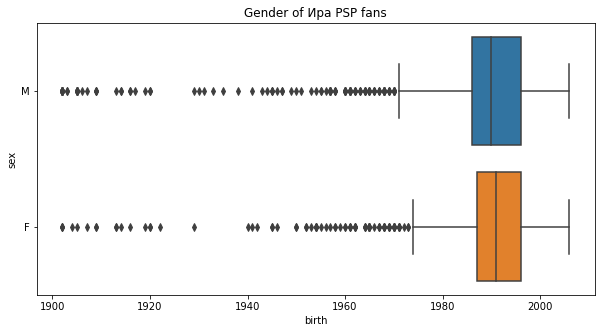

In [78]:
plt.figure(figsize=(10,5)) 
plt.title('Gender of –ò—Ä–∞ PSP fans')
sns.boxplot(x="birth", y="sex", data=new_df)
plt.show()

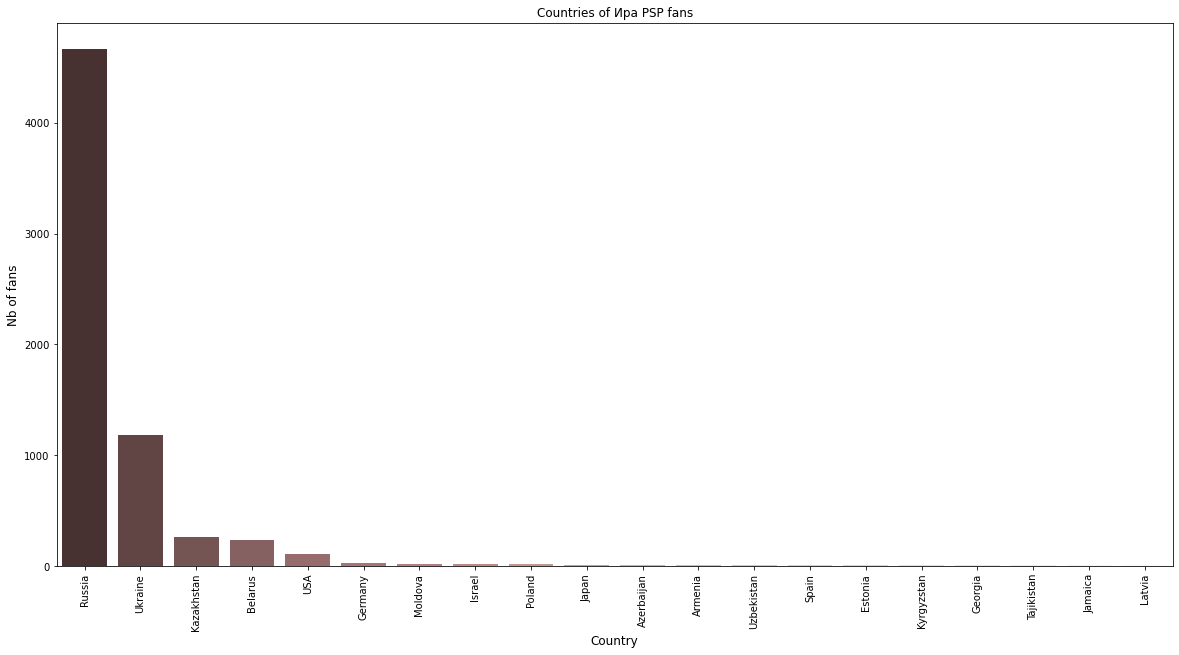

In [56]:
country_count = df["country"].value_counts().drop("-")
country_count = country_count [0:20]
plt.figure(figsize=(20,10))
ax = sns.barplot(country_count.index,country_count.values, palette="pink")
plt.title("Countries of –ò—Ä–∞ PSP fans")
plt.ylabel("Nb of fans", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [80]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Kazan')] = "msk + kzn"
df.loc[(df['city'] != "msk + kzn") & (df['city'] != "-")] = "province"

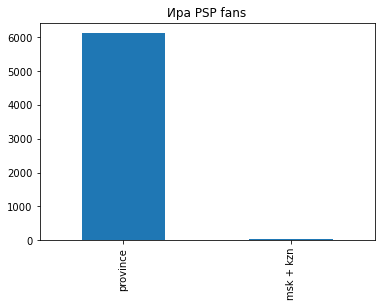

In [82]:
city_count  = df['city'].value_counts().drop('-') 
plt.title("–ò—Ä–∞ PSP fans")
city_count = city_count[:20] 
axes = city_count.plot.bar() 

In [38]:

with open("../domashka/aigelmusic_savemembers.tsv", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("../domashka/zatmenie_official_members.tsv", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("../domashka/members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

In [39]:
members3 = set(members3)
members1 = set(members1)
members2 = set(members2)
members3.remove("")

In [40]:
united_members = members1.union(members2).union(members3)

In [41]:

intersected_members = members1.intersection(members2).intersection(members3)

In [42]:
with open("intersection.tsv", "w", encoding="utf-8") as w:
    for i in intersected_members:
        w.write(i+"\n")

In [43]:
print (len(intersected_members))

3


In [44]:
print (intersected_members)

{'74450877,\tDiana\tTsarkova\tF\t-\tMoscow\tRussia', '39081781,\tAnna\tNikonorova\tF\t-\tSaint Petersburg\tRussia', '205607257,\tIza\tMungieva\tF\t1997\tMoscow\tRussia'}


In [45]:
dl = pd.read_csv("intersection.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [23]:
dl

id   name     surname sex birth              city country
0   74450877,  Diana    Tsarkova   F     -            Moscow  Russia
1   39081781,   Anna  Nikonorova   F     -  Saint Petersburg  Russia
2  205607257,    Iza    Mungieva   F  1997            Moscow  Russia

In [88]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100  
   
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [89]:
ira_psp_posts = get_posts("ira_psp")


In [90]:
for post in ira_psp_posts[:10]:
    print(post)

–° –≤–µ—Ä–æ–π –≤ —Å–µ–±—è, –∏–¥—ë–º –¥–æ –∫–æ–Ω—Ü–∞! ‚òÄÔ∏è
ü§î –ö–∞–∫ –±—ã—Ç—å, –µ—Å–ª–∏ –æ—Ö–æ—Ç–∞ –ª–µ—Ç–∞—Ç—å?
–ù–æ—á—å –æ—Å–æ–±–æ–µ –≤—Ä–µ–º—è —Å—É—Ç–æ–∫, –∫–æ–≥–¥–∞ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ –ø–æ—Ä–æ–∫–∏ –¥–æ—Å—Ç–∏–≥–∞—é—Ç —Å–≤–æ–µ–≥–æ –∞–ø–æ–≥–µ—è üî•üåë
[id3926689|–ò—Ä–∞ PSP] –≤–º–µ—Å—Ç–µ [id5856094|Puffy Puff] –æ—Ç—Å—É–¥–∏–ª–∞ —Ñ–∏–Ω–∞–ª —Ö–∏–ø-—Ö–æ–ø —Ñ–µ—Å—Ç–∏–≤–∞–ª—è [club164863311|RAP DEVIL] –≤ –ù–∏–∂–Ω–µ–º –ù–æ–≤–≥–æ—Ä–æ–¥–µ.
–£–∂–µ –∑–∞–≤—Ç—Ä–∞!
–ì–æ—Ä—è—á–∏–π —Å–±–æ—Ä–Ω–∏–∫ –¥–ª—è –ª—é–±–∏—Ç–µ–ª–µ–π –∂–µ–Ω—Å–∫–æ–≥–æ —Ä—ç–ø–∞ üëçüèªüòç
–Ø –ª–µ—á—É –Ω–∞ –≤–µ—á–µ—Ä–∏–Ω—É –∏ —Å–æ –º–Ω–æ–π –º–æ–∏ –ø–æ–¥—Ä—É–≥–∏ ü§©
–°–æ–ª–Ω—Ü–µ —Å–≤–µ—Ç–∏—Ç ‚òÄÔ∏èüòä
–°–∏–ª–∞ –≤–æ–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–æ–±–∏—Ç—å—Å—è –º–µ—á—Ç—ã!
‚ù§Ô∏è –ª—é–±–æ–≤—å –Ω–∞—à–µ –≤—Å—ë ‚ù§Ô∏è


In [91]:
print (ira_psp_posts)

['–° –≤–µ—Ä–æ–π –≤ —Å–µ–±—è, –∏–¥—ë–º –¥–æ –∫–æ–Ω—Ü–∞! ‚òÄÔ∏è', 'ü§î –ö–∞–∫ –±—ã—Ç—å, –µ—Å–ª–∏ –æ—Ö–æ—Ç–∞ –ª–µ—Ç–∞—Ç—å?', '–ù–æ—á—å –æ—Å–æ–±–æ–µ –≤—Ä–µ–º—è —Å—É—Ç–æ–∫, –∫–æ–≥–¥–∞ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ –ø–æ—Ä–æ–∫–∏ –¥–æ—Å—Ç–∏–≥–∞—é—Ç —Å–≤–æ–µ–≥–æ –∞–ø–æ–≥–µ—è üî•üåë', '[id3926689|–ò—Ä–∞ PSP] –≤–º–µ—Å—Ç–µ [id5856094|Puffy Puff] –æ—Ç—Å—É–¥–∏–ª–∞ —Ñ–∏–Ω–∞–ª —Ö–∏–ø-—Ö–æ–ø —Ñ–µ—Å—Ç–∏–≤–∞–ª—è [club164863311|RAP DEVIL] –≤ –ù–∏–∂–Ω–µ–º –ù–æ–≤–≥–æ—Ä–æ–¥–µ.', '–£–∂–µ –∑–∞–≤—Ç—Ä–∞!', '–ì–æ—Ä—è—á–∏–π —Å–±–æ—Ä–Ω–∏–∫ –¥–ª—è –ª—é–±–∏—Ç–µ–ª–µ–π –∂–µ–Ω—Å–∫–æ–≥–æ —Ä—ç–ø–∞ üëçüèªüòç', '–Ø –ª–µ—á—É –Ω–∞ –≤–µ—á–µ—Ä–∏–Ω—É –∏ —Å–æ –º–Ω–æ–π –º–æ–∏ –ø–æ–¥—Ä—É–≥–∏ ü§©', '–°–æ–ª–Ω—Ü–µ —Å–≤–µ—Ç–∏—Ç ‚òÄÔ∏èüòä', '–°–∏–ª–∞ –≤–æ–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–æ–±–∏—Ç—å—Å—è –º–µ—á—Ç—ã!', '‚ù§Ô∏è –ª—é–±–æ–≤—å –Ω–∞—à–µ –≤—Å—ë ‚ù§Ô∏è', '–ü—É—Å—Ç—å –≤–º–µ—Å—Ç–æ —Ç—ë–º–Ω—ã—Ö —Å–≤–æ–¥–æ–≤, —è –±—É–¥—É –≤–∏–¥–µ—Ç—å —Å–æ–Ω üí§', 'ü§© –†–≤–∞—Ç—å –Ω–∞ –±–∏—Ç–∞—Ö, –¥–∞–±—ã –ª–µ—Ç–∞—Ç—å!', '–ö—Ç–æ –º—ã üòé', '–û—Å–µ–Ω—å –

In [92]:
ira_string = ""
for i in ira_psp_posts:
    ira_string += str(i)
ira_string = re.sub('\[(id|club)\d*\|[–ê-–Ø–∞-—è A-Za-z0-9—ë–Å\-\,\@\(\)\"\'\:\¬´\¬ª\|\$\^\&\*\‚Äô\.\`]*\]', '', ira_string)

In [93]:
print (ira_string)

–° –≤–µ—Ä–æ–π –≤ —Å–µ–±—è, –∏–¥—ë–º –¥–æ –∫–æ–Ω—Ü–∞! ‚òÄÔ∏èü§î –ö–∞–∫ –±—ã—Ç—å, –µ—Å–ª–∏ –æ—Ö–æ—Ç–∞ –ª–µ—Ç–∞—Ç—å?–ù–æ—á—å –æ—Å–æ–±–æ–µ –≤—Ä–µ–º—è —Å—É—Ç–æ–∫, –∫–æ–≥–¥–∞ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ –ø–æ—Ä–æ–∫–∏ –¥–æ—Å—Ç–∏–≥–∞—é—Ç —Å–≤–æ–µ–≥–æ –∞–ø–æ–≥–µ—è üî•üåë –≤–º–µ—Å—Ç–µ  –æ—Ç—Å—É–¥–∏–ª–∞ —Ñ–∏–Ω–∞–ª —Ö–∏–ø-—Ö–æ–ø —Ñ–µ—Å—Ç–∏–≤–∞–ª—è  –≤ –ù–∏–∂–Ω–µ–º –ù–æ–≤–≥–æ—Ä–æ–¥–µ.–£–∂–µ –∑–∞–≤—Ç—Ä–∞!–ì–æ—Ä—è—á–∏–π —Å–±–æ—Ä–Ω–∏–∫ –¥–ª—è –ª—é–±–∏—Ç–µ–ª–µ–π –∂–µ–Ω—Å–∫–æ–≥–æ —Ä—ç–ø–∞ üëçüèªüòç–Ø –ª–µ—á—É –Ω–∞ –≤–µ—á–µ—Ä–∏–Ω—É –∏ —Å–æ –º–Ω–æ–π –º–æ–∏ –ø–æ–¥—Ä—É–≥–∏ ü§©–°–æ–ª–Ω—Ü–µ —Å–≤–µ—Ç–∏—Ç ‚òÄÔ∏èüòä–°–∏–ª–∞ –≤–æ–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–æ–±–∏—Ç—å—Å—è –º–µ—á—Ç—ã!‚ù§Ô∏è –ª—é–±–æ–≤—å –Ω–∞—à–µ –≤—Å—ë ‚ù§Ô∏è–ü—É—Å—Ç—å –≤–º–µ—Å—Ç–æ —Ç—ë–º–Ω—ã—Ö —Å–≤–æ–¥–æ–≤, —è –±—É–¥—É –≤–∏–¥–µ—Ç—å —Å–æ–Ω üí§ü§© –†–≤–∞—Ç—å –Ω–∞ –±–∏—Ç–∞—Ö, –¥–∞–±—ã –ª–µ—Ç–∞—Ç—å!–ö—Ç–æ –º—ã üòé–û—Å–µ–Ω—å –ø–æ—Ä–∞ –ø–æ—ç—Ç–æ–≤ ‚òÄÔ∏èüòâüçÅ–ò–Ω–æ–≥–¥–∞ —Å–ª–æ–≤–∞ —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ —Å–ª–æ–≤–∞. –ü–æ—Å—Ç—É–ø–∫–∏ —Ä–µ—à–∞—é—Ç –≤

In [94]:
pattern_link = re.compile(r"[A-z0-9]+[/.\/:]+[A-z0-9_]+[\.\/]+[A-z0-9]+[A-z1-9/\.]+\b")

In [95]:
print(re.sub(pattern_link, "WEBLINK", ira_string))

–° –≤–µ—Ä–æ–π –≤ —Å–µ–±—è, –∏–¥—ë–º –¥–æ –∫–æ–Ω—Ü–∞! ‚òÄÔ∏èü§î –ö–∞–∫ –±—ã—Ç—å, –µ—Å–ª–∏ –æ—Ö–æ—Ç–∞ –ª–µ—Ç–∞—Ç—å?–ù–æ—á—å –æ—Å–æ–±–æ–µ –≤—Ä–µ–º—è —Å—É—Ç–æ–∫, –∫–æ–≥–¥–∞ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ –ø–æ—Ä–æ–∫–∏ –¥–æ—Å—Ç–∏–≥–∞—é—Ç —Å–≤–æ–µ–≥–æ –∞–ø–æ–≥–µ—è üî•üåë –≤–º–µ—Å—Ç–µ  –æ—Ç—Å—É–¥–∏–ª–∞ —Ñ–∏–Ω–∞–ª —Ö–∏–ø-—Ö–æ–ø —Ñ–µ—Å—Ç–∏–≤–∞–ª—è  –≤ –ù–∏–∂–Ω–µ–º –ù–æ–≤–≥–æ—Ä–æ–¥–µ.–£–∂–µ –∑–∞–≤—Ç—Ä–∞!–ì–æ—Ä—è—á–∏–π —Å–±–æ—Ä–Ω–∏–∫ –¥–ª—è –ª—é–±–∏—Ç–µ–ª–µ–π –∂–µ–Ω—Å–∫–æ–≥–æ —Ä—ç–ø–∞ üëçüèªüòç–Ø –ª–µ—á—É –Ω–∞ –≤–µ—á–µ—Ä–∏–Ω—É –∏ —Å–æ –º–Ω–æ–π –º–æ–∏ –ø–æ–¥—Ä—É–≥–∏ ü§©–°–æ–ª–Ω—Ü–µ —Å–≤–µ—Ç–∏—Ç ‚òÄÔ∏èüòä–°–∏–ª–∞ –≤–æ–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–æ–±–∏—Ç—å—Å—è –º–µ—á—Ç—ã!‚ù§Ô∏è –ª—é–±–æ–≤—å –Ω–∞—à–µ –≤—Å—ë ‚ù§Ô∏è–ü—É—Å—Ç—å –≤–º–µ—Å—Ç–æ —Ç—ë–º–Ω—ã—Ö —Å–≤–æ–¥–æ–≤, —è –±—É–¥—É –≤–∏–¥–µ—Ç—å —Å–æ–Ω üí§ü§© –†–≤–∞—Ç—å –Ω–∞ –±–∏—Ç–∞—Ö, –¥–∞–±—ã –ª–µ—Ç–∞—Ç—å!–ö—Ç–æ –º—ã üòé–û—Å–µ–Ω—å –ø–æ—Ä–∞ –ø–æ—ç—Ç–æ–≤ ‚òÄÔ∏èüòâüçÅ–ò–Ω–æ–≥–¥–∞ —Å–ª–æ–≤–∞ —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ —Å–ª–æ–≤–∞. –ü–æ—Å—Ç—É–ø–∫–∏ —Ä–µ—à–∞—é—Ç –≤

In [96]:
def save_posts_to_file(filename, post):
    with open(filename, 'w', encoding="utf-8") as f:
        f.write(post)

In [97]:
ira_psp_posts = get_posts("ira_psp")

save_posts_to_file("ira_psp_posts.tsv", ira_string)

In [50]:
concert_counter = re.findall(r'–ö|–∫–æ–Ω—Ü–µ—Ä—Ç', ira_string)
print("–ö–æ–Ω—Ü–µ—Ä—Ç–æ–≤ —É –ò—Ä—ã PSP:", len(concert_counter))

–ö–æ–Ω—Ü–µ—Ä—Ç–æ–≤ —É –ò—Ä—ã PSP: 327


In [98]:
!pip install natasha

In [99]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [100]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [101]:
doc = Doc(ira_string)
doc.segment(segmenter)

In [102]:
[i.text for i in doc.sents]

['–° –≤–µ—Ä–æ–π –≤ —Å–µ–±—è, –∏–¥—ë–º –¥–æ –∫–æ–Ω—Ü–∞!',
 '‚òÄÔ∏èü§î –ö–∞–∫ –±—ã—Ç—å, –µ—Å–ª–∏ –æ—Ö–æ—Ç–∞ –ª–µ—Ç–∞—Ç—å?–ù–æ—á—å –æ—Å–æ–±–æ–µ –≤—Ä–µ–º—è —Å—É—Ç–æ–∫, –∫–æ–≥–¥–∞ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ –ø–æ—Ä–æ–∫–∏ –¥–æ—Å—Ç–∏–≥–∞—é—Ç —Å–≤–æ–µ–≥–æ –∞–ø–æ–≥–µ—è üî•üåë –≤–º–µ—Å—Ç–µ  –æ—Ç—Å—É–¥–∏–ª–∞ —Ñ–∏–Ω–∞–ª —Ö–∏–ø-—Ö–æ–ø —Ñ–µ—Å—Ç–∏–≤–∞–ª—è  –≤ –ù–∏–∂–Ω–µ–º –ù–æ–≤–≥–æ—Ä–æ–¥–µ.–£–∂–µ –∑–∞–≤—Ç—Ä–∞!–ì–æ—Ä—è—á–∏–π —Å–±–æ—Ä–Ω–∏–∫ –¥–ª—è –ª—é–±–∏—Ç–µ–ª–µ–π –∂–µ–Ω—Å–∫–æ–≥–æ —Ä—ç–ø–∞ üëçüèªüòç–Ø –ª–µ—á—É –Ω–∞ –≤–µ—á–µ—Ä–∏–Ω—É –∏ —Å–æ –º–Ω–æ–π –º–æ–∏ –ø–æ–¥—Ä—É–≥–∏ ü§©–°–æ–ª–Ω—Ü–µ —Å–≤–µ—Ç–∏—Ç ‚òÄÔ∏èüòä–°–∏–ª–∞ –≤–æ–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–æ–±–∏—Ç—å—Å—è –º–µ—á—Ç—ã!‚ù§Ô∏è –ª—é–±–æ–≤—å –Ω–∞—à–µ –≤—Å—ë ‚ù§Ô∏è–ü—É—Å—Ç—å –≤–º–µ—Å—Ç–æ —Ç—ë–º–Ω—ã—Ö —Å–≤–æ–¥–æ–≤, —è –±—É–¥—É –≤–∏–¥–µ—Ç—å —Å–æ–Ω üí§ü§© –†–≤–∞—Ç—å –Ω–∞ –±–∏—Ç–∞—Ö, –¥–∞–±—ã –ª–µ—Ç–∞—Ç—å!–ö—Ç–æ –º—ã üòé–û—Å–µ–Ω—å –ø–æ—Ä–∞ –ø–æ—ç—Ç–æ–≤ ‚òÄÔ∏èüòâüçÅ–ò–Ω–æ–≥–¥–∞ —Å–ª–æ–≤–∞ —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ —Å–ª–æ–≤–∞.',
 '–ü–æ—Å—Ç—É–ø–∫–∏ —Ä–µ—

In [103]:
print([i.text for i in doc.tokens])

['–°', '–≤–µ—Ä–æ–π', '–≤', '—Å–µ–±—è', ',', '–∏–¥—ë–º', '–¥–æ', '–∫–æ–Ω—Ü–∞', '!', '‚òÄÔ∏èü§î', '–ö–∞–∫', '–±—ã—Ç—å', ',', '–µ—Å–ª–∏', '–æ—Ö–æ—Ç–∞', '–ª–µ—Ç–∞—Ç—å', '?', '–ù–æ—á—å', '–æ—Å–æ–±–æ–µ', '–≤—Ä–µ–º—è', '—Å—É—Ç–æ–∫', ',', '–∫–æ–≥–¥–∞', '—á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ', '–ø–æ—Ä–æ–∫–∏', '–¥–æ—Å—Ç–∏–≥–∞—é—Ç', '—Å–≤–æ–µ–≥–æ', '–∞–ø–æ–≥–µ—è', 'üî•üåë', '–≤–º–µ—Å—Ç–µ', '–æ—Ç—Å—É–¥–∏–ª–∞', '—Ñ–∏–Ω–∞–ª', '—Ö–∏–ø-—Ö–æ–ø', '—Ñ–µ—Å—Ç–∏–≤–∞–ª—è', '–≤', '–ù–∏–∂–Ω–µ–º', '–ù–æ–≤–≥–æ—Ä–æ–¥–µ', '.', '–£–∂–µ', '–∑–∞–≤—Ç—Ä–∞', '!', '–ì–æ—Ä—è—á–∏–π', '—Å–±–æ—Ä–Ω–∏–∫', '–¥–ª—è', '–ª—é–±–∏—Ç–µ–ª–µ–π', '–∂–µ–Ω—Å–∫–æ–≥–æ', '—Ä—ç–ø–∞', 'üëçüèªüòç–Ø', '–ª–µ—á—É', '–Ω–∞', '–≤–µ—á–µ—Ä–∏–Ω—É', '–∏', '—Å–æ', '–º–Ω–æ–π', '–º–æ–∏', '–ø–æ–¥—Ä—É–≥–∏', 'ü§©–°–æ–ª–Ω—Ü–µ', '—Å–≤–µ—Ç–∏—Ç', '‚òÄÔ∏èüòä–°–∏–ª–∞', '–≤–æ–ª–∏', '–ø–æ–∑–≤–æ–ª—è–µ—Ç', '–¥–æ–±–∏—Ç—å—Å—è', '–º–µ—á—Ç—ã', '!', '‚ù§Ô∏è', '–ª—é–±–æ–≤—å', '–Ω–∞—à–µ', '–≤—Å—ë', '‚ù§Ô∏è–ü—É—Å—Ç—å', '–≤–º–µ—Å—Ç–æ', '—Ç—ë–º–Ω—ã—Ö', '—Å–≤–æ–¥–æ–≤', ',', '—è', '–±—É

In [104]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [105]:
print([i.lemma for i in doc.tokens])

['—Å', '–≤–µ—Ä–∞', '–≤', '—Å–µ–±—è', ',', '–∏–¥—Ç–∏', '–¥–æ', '–∫–æ–Ω–µ—Ü', '!', '‚òÄÔ∏èü§î', '–∫–∞–∫', '–±—ã—Ç—å', ',', '–µ—Å–ª–∏', '–æ—Ö–æ—Ç–∞', '–ª–µ—Ç–∞—Ç—å', '?', '–Ω–æ—á—å', '–æ—Å–æ–±—ã–π', '–≤—Ä–µ–º—è', '—Å—É—Ç–∫–∏', ',', '–∫–æ–≥–¥–∞', '—á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π', '–ø–æ—Ä–æ–∫', '–¥–æ—Å—Ç–∏–≥–∞—Ç—å', '—Å–≤–æ–π', '–∞–ø–æ–≥–µ–π', 'üî•üåë', '–≤–º–µ—Å—Ç–µ', '–æ—Ç—Å—É–¥–∏—Ç—å', '—Ñ–∏–Ω–∞–ª', '—Ö–∏–ø-—Ö–æ–ø', '—Ñ–µ—Å—Ç–∏–≤–∞–ª—å', '–≤', '–Ω–∏–∂–Ω–∏–π', '–Ω–æ–≤–≥–æ—Ä–æ–¥', '.', '—É–∂–µ', '–∑–∞–≤—Ç—Ä–∞', '!', '–≥–æ—Ä—è—á–∏–π', '—Å–±–æ—Ä–Ω–∏–∫', '–¥–ª—è', '–ª—é–±–∏—Ç–µ–ª—å', '–∂–µ–Ω—Å–∫–∏–π', '—Ä—ç–ø', 'üëçüèªüòç—è', '–ª–µ—Ç–µ—Ç—å', '–Ω–∞', '–≤–µ—á–µ—Ä–∏–Ω', '–∏', '—Å', '—è', '–º–æ–π', '–ø–æ–¥—Ä—É–≥–∞', 'ü§©—Å–æ–ª–Ω—Ü–µ', '—Å–≤–µ—Ç–∏—Ç—å', '‚òÄÔ∏èüòä—Å–∏–ª–∞', '–≤–æ–ª—è', '–ø–æ–∑–≤–æ–ª—è—Ç—å', '–¥–æ–±–∏—Ç—å—Å—è', '–º–µ—á—Ç–∞', '!', '‚ù§Ô∏è', '–ª—é–±–æ–≤—å', '–Ω–∞—à', '–≤–µ—Å—å', '‚ù§Ô∏è–ø—É—Å—Ç—å', '–≤–º–µ—Å—Ç–æ', '—Ç–µ–º–Ω—ã–π', '—Å–≤–æ–¥', ',', '—è', '–±—ã—Ç—å', '–≤–∏–¥–µ—Ç—å', '

In [106]:
doc.tag_ner(ner_tagger)

In [107]:
locations = set()
persons = set()
organizations = set()

with open("../domashka/ira_psp_posts.tsv", 'r', encoding="utf-8") as f:
    for line in f:
        text = line.strip()
        
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [109]:
print(locations) #IRA_PSP

{'–ë–æ–ª–≥–∞—Ä–∏—è', '–†—É—Å—Ç–∞–≤–µ–ª–∏', '–°–µ—Å—Ç—Ä–µ–Ω–∫–∞', '–ê—â–µ—É–ª–æ–≤ –ü–µ—Ä–µ—É–ª–æ–∫', '–ö—Ä—ç–∫ –†–∞–π–æ–Ω –ú–æ–µ–π –ú–µ—á—Ç–∞', '–î–∏–º–∏—Ç—Ä–æ–≤–≥—Ä–∞–¥', '–°—Ç–∞–∫–∞–Ω', '–ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥', '–ö–∞–ª–∏—Ñ–æ—Ä–Ω–∏—è', '–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥', '–í–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫', '–ë–æ–ª—å—à–∞—è –ö–æ–Ω—é—à–µ–Ω–Ω–∞—è', '–°–æ–ª–Ω—Ü–µ', '–ù–∞–∑—ã–≤–∞—é—â–∏–π—Å—è –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥', '–ê–º–µ—Ä–∏–∫–∞', '–ù–∞–±–µ—Ä–µ–∂–Ω–æ–π –∫–∞–Ω–∞–ª', '–ë–∞—É–º–∞–Ω—Å–∫–∞—è', '–ú—å—é–∑', '–ú–û–°–ö–í–ê', '–ü–æ—Ç–∞–ø–æ–≤—Å–∫–∏–π –ø–µ—Ä', '–í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è', '–°–®–ê', '–ê—Ä–±–∞—Ç', '–ú–∞—Ä–∫–∏–Ω', '–ö–∞–Ω–∞–¥–∞', '–ü–ò–¢–ï–†', '–ì–æ—Ä—å–∫–∏–π', '–õ—É–∂–Ω–∏–∫–∞—Ö', '–ù–∏–∂–µ–º-–ù–æ–≤–≥–æ—Ä–æ–¥', '–õ–æ—Å-–ê–Ω–¥–∂–µ–ª–µ—Å', '–ö—Ä–µ–∫', '–í–∞—Ä–≤–∞—Ä—Å–∫–∞—è —É–ª–∏—Ü–∞', '–ú–æ—Å–∫–≤–∞', '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–∏–π —Å–∞–¥', '–†–æ–º–æ–π', '–ë–µ–ª–æ—Ä—É—Å—Å–∏—è', '–í–æ–ª–≥–∞', '–ú—Å', '–ù–∞–≥–∞—è', '–°–æ—á–∏', '–ö–æ–∂–µ–≤–µ–Ω–Ω—ã–π –ø–µ—Ä–µ—É–ª–æ–∫', '–£–∫—Ä–∞–∏–Ω–∞',

In [110]:
with open ("locations.txt", 'w', encoding="utf-8") as f:
for word in locations:
f.write (word +"\n") 

IndentationError: expected an indented block (<ipython-input-110-43a9d11be522>, line 2)

In [88]:
print(persons)

{'–ö–ò–ú–ê', '–≠–º–∏–Ω–µ–º–∞', '–≠–ª–ª–∏–æ—Ç—Ç', '–ö–∏–º –ë–∞–∫—Å–∏–Ω (RMF)', '–ë–∞—Å—Ç–æ–π', 'M.I.A.', '–ì—Ä–µ—à–Ω–∏–∫', '–ò—Ä–∏–Ω–∞', '–ë–∞—Ç—Ç–ª', '–í–∞—Å–∏–ª–∏–π –ë–æ', '–ù–∏–∫–∏', '–ë–ª–æ–Ω–¥–∏–Ω–∫–∞ –ö—Å–Æ', '–ë–∞—Å–æ—Ç–∞', '–ú–∏—Å—Å–∏ –≠–ª–ª–∏–æ—Ç—Ç', '–ò–ª—å—è –°–∞–º–æ–π–ª–æ–≤', '–°–ª–∞–≤–æ–Ω', '–ì—Ä—ç–º–º–∏', '–ú–∞–Ω–∏ –ú–∞–π–∫ (D. O', '–ú—É–∫ (–ë–ª–∞–Ω–∂', '–î–∞–≤–∏–¥', '–°–∞–Ω–¥—Ä–∞ ¬´–ü–µ–ø¬ª –î–µ–Ω—Ç–æ–Ω (Sandra Denton)', '–õ—é–±–æ–≤—å', '–£—Ç–æ–Ω–∏', '–õ–µ–Ω–∞', '–†—ç–ø', '–ü—Ç–∞—Ö–∏', '–ù–∞—Å—Ç–∞–ª–∞ –ü–æ—Ä–∞', '–í–ª–∞—Å—Ç–µ–ª–∏–Ω', '–°–∏—Å—å–∫–∞', '–†—ã–±–∫–∞', '–ù–∏–∫–∏ –ú–∏–Ω–∞–∂ (Nicki Minaj)', '–í–∏—Ç–µ–∫', '–ö—Å–µ–Ω–∏—è –°–æ—Ç–∫–∏–Ω–∞', '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ú–∏–≥—É–Ω–æ–≤', '–ö–∏–º–æ–π', '–ê–Ω–¥—Ä–µ–π –¢—Ä–æ—à–∞–Ω–∏–Ω', '–≠–º-—Å–∏ –õ–∞–π—Ç (MC Lyte)', '–ú–∏–Ω–∞–∂', '–°–Ω–µ–≥—É—Ä–∞', '–ê–Ω–∞—Ö–∞—Ç–∞', '–ú–∞–π—è (Mya)', '–ö–∏–º', '–ú–∞—Ç—Ö–∞–Ω–≥–∏ ¬´–ú–∞–π–∞¬ª –ê—Ä—É–ª–ø—Ä–∞–≥–∞—Å–∞–º (Mathangi ‚ÄúMaya‚Äù Arulpragasam)', '–°–æ–ª—Ç-–Ω-–ü–µ–ø–∞', '–í–ª–∞–¥ –í–∞–ª–æ–≤', 

In [89]:
print(organizations)

{'Digital Squad', 'Bad Girls', '–í–£–ó', 'IraPSP', '–†—ã–Ω–æ—á–Ω—ã–µ–û—Ç–Ω–æ—à–µ–Ω–∏—è', 'Jein', '–¶–µ–Ω—Ç—Ä –ö—É–ª—å—Ç—É—Ä–∞ ¬´–†–µ–∫–æ—Ä–¥', '–®—ãZa', '–ê–ª–∏–±–∏', 'TV!', '–õ–∏—Ä–∏–∫–∞', '–Ø', 'RAP MUSIC', '#–†–≤–∞—Ç—å–Ω–∞–±–∏—Ç–∞—Ö', 'RAIDA', '–°–æ–ª—Ç-–Ω-–ü–µ–ø–∞ (Salt-n-Pepa)', '–ö–û–ú–ê–ù–î–ê –ù–û–í–ê–Ø –®–ö–û–õ–ê', 'Rolexx', '–®–ïFF', 'Streetball', 'Hollyhood', '–ú–∞—è–∫ On The RAP', 'Little Big', 'Dross', 'The Village', '–í–ö', 'LOOKIN ROOMS', 'XXL', '–ù–∏–∂–Ω–∏–π–ù–æ–≤–≥–æ—Ä–æ–¥', '–°–≤–æ–±–æ–¥–Ω–∞—è', '–õ–æ–∫–æ–º–æ—Ç–∏–≤', 'EVA', '–®–æ—É –°–æ–ª—Ç-–Ω-–ü–µ–ø', 'Personage Marz', 'Jahn', '–ì–æ–ª–æ—Å –£–ª–∏—Ü', 'REpac', '–ê—Ñ–∏—à–∞', 'Sin City', 'Sazon', '–®–∫–æ–ª–∞', 'LITTLE BIGüëç', 'RAP Music', 'True Star', "L'One", '—Ç–µ–º–µ–ü—Ä–µ–∑–µ–Ω—Ç–∞—Ü–∏—è', '–ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∏–π –•–∏–ø-–•–æ–ø', 'P-–¢ONE', '–ù–æ–≤–∞—è —à–∫–æ–ª–∞ –†—É—Å—Å–∫–∏–π –•–∏–ø-–•–æ–ø', 'Tommy Boy Records', 'Hip-Hop.Ru', 'ONYX', '–°–æ–ª—Ç-–Ω-–ü–µ–ø–∞', '–ì–æ—Ä—å–∫–æ–≤—Å–∫–æ–µ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω–æ